# Linear regression

## Libraries and settings

In [1]:
# SCIKIT-LEARN (Wenn sklearn nicht funktioniert)
# Libraries
import os
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

C:\Workspacezhaw\data_analytics\Woche 8


## Import the apartment data

In [2]:
# Define columns for import
# Alle daten der vergangenen Übungen sind jetzt in diesem Datensatz vereint und angewendet
columns = [ 'web-scraper-order',
            'address_raw',
            'rooms',
            'area',
            'luxurious',
            'price',
            'price_per_m2',
            'lat',
            'lon',
            'bfs_number', #
            'bfs_name',
            'pop',  #bevölkerung
            'pop_dens', #bevölkerungsdidche pro quadratmeter
            'frg_pct', #foreign percent
            'emp',
            'tax_income',
            'dist_supermarket']

# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv", sep=";", encoding='utf-8')[columns]

# Rename variable 'web-scraper-order' to 'apmt_id'
df_orig = df_orig.rename(columns={'web-scraper-order': 'id'})

# Remove missing values
df = df_orig.dropna()
df.head(5)

# Remove duplicates
df = df.drop_duplicates()

# Remove some 'extreme' values
# Extermwerte herausschmeissen,indem man Ränder festlegt (grösser als 5000 sind zum Bsp. spezieller)
df = df.loc[(df['price'] >= 1000) & 
            (df['price'] <= 5000)]

print(df.shape) #nach der Filterung haben wir dann ca noch 800 Datensätze und mit denen arbeiten wir heute 
df.head(5)

(804, 17)


,id,address_raw,rooms,area,luxurious,price,price_per_m2,lat,lon,bfs_number,bfs_name,pop,pop_dens,frg_pct,emp,tax_income,dist_supermarket
0,1662023695-433,"Sunnenbergstrasse 15, 8633 Wolfhausen, ZH",3.5,122,1,3180,26.07,47.255714,8.804976,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,317.117916
1,1662023720-634,"Blumenbergstrasse 7, 8633 Wolfhausen, ZH",4.0,87,0,1690,19.43,47.254879,8.793746,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,612.612674
2,1662023745-834,"8608 Bubikon, ZH",3.5,92,0,2350,25.54,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
3,1662023701-503,"8608 Bubikon, ZH",3.5,130,0,2500,19.23,47.277386,8.800306,112,Bubikon,7344,632.558140,11.410675,3617.0,79385.90434,2269.090923
4,1662023745-820,"Lavaterstr. 63, 8002 Zürich, ZH",2.5,78,0,3760,48.21,47.361378,8.533339,261,Zürich,420217,4778.994655,32.458468,491193.0,82932.73770,349.937421


# Aufgabe 1b: Lineare Regression (mit price_per_m2 & area)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, #man muss nicht unbedingt 80:20 (bei vielen Daten kann man auch mit viel weniger Daten samplen vlt 50:50 - leave-on-out wenn wenig Daten)
                                                    random_state=42)
print('X_train:')
print(X_train.head(), '\n')
print('y_train:')
print(y_train.head())

X_train:
362     75
369     90
496    100
349     94
308     94
Name: area, dtype: int64 

y_train:
362    24.53
369    17.44
496    19.41
349    26.38
308    29.79
Name: price_per_m2, dtype: float64


In [4]:
# Fit the regression model mit Linearer Einfach-Regression
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model (slope = Steigung der Regressionsgerade)
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}') 
print(f'Slope of regression line (beta):          {slope:.3f}') 
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            48.05
Slope of regression line (beta):          -0.227
p-value:                                  0.0000
R-squared (coefficient of determination): 0.2978


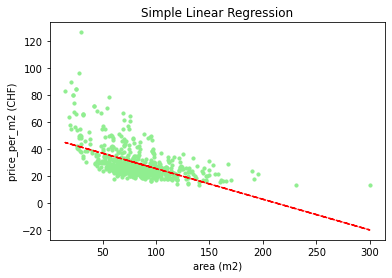

In [5]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='lightgreen')
plt.plot(X_train, mymodel, color='red', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price_per_m2 (CHF)')

plt.show()

In [6]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price_per_m2 in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price_per_m2 in dataset: {y_train[0]:.2f}')
print(f'1st Residual price_per_m2 in dataset: {residuals[0]:.2f}')


1st Predicted price_per_m2 in dataset: 31.03
1st Observed price_per_m2 in dataset: 26.07
1st Residual price_per_m2 in dataset: 4.96


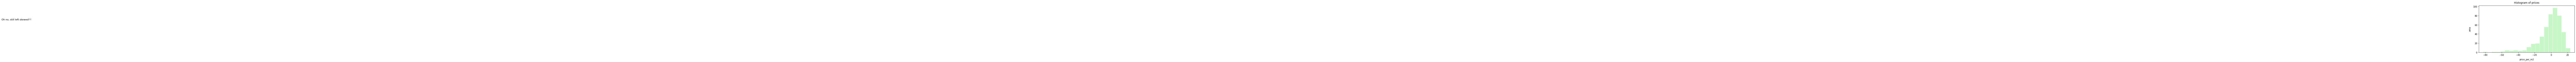

In [7]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='lightgreen',
                            alpha=0.5,
                           rwidth=0.95)

# Set title and labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('area', fontsize=10, labelpad=10)
plt.title('Histogram of prices', fontsize=12, pad=10)

# Add text annotation
plt.text(-3100, 70, s="Oh no, still left skewed!!!", 
         fontsize=11, 
         color="black")

# Show plot (ein Residuenplot sollte eigentlich normalverteilt sein)
plt.show()

#### Aufgabe b
The R^2 is higher and the histogram is even more left skewed.

# Aufgabe 1c: Lineare Regression (mit price_per_m2 & rooms)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(df['rooms'], 
                                                    df['price_per_m2'], 
                                                    test_size=0.20, #man muss nicht unbedingt 80:20 (bei vielen Daten kann man auch mit viel weniger Daten samplen vlt 50:50 - leave-on-out wenn wenig Daten)
                                                    random_state=42)
print('X_train:')
print(X_train.head(), '\n')

print('y_train:')
print(y_train.head())

X_train:
362    3.5
369    3.5
496    3.5
349    3.5
308    3.5
Name: rooms, dtype: float64 

y_train:
362    24.53
369    17.44
496    19.41
349    26.38
308    29.79
Name: price_per_m2, dtype: float64


In [9]:
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}') #Schnittpunkt mit y-Achse (braucht es)
print(f'Slope of regression line (beta):          {slope:.3f}') #steigung
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            48.15
Slope of regression line (beta):          -5.798
p-value:                                  0.0000
R-squared (coefficient of determination): 0.2438


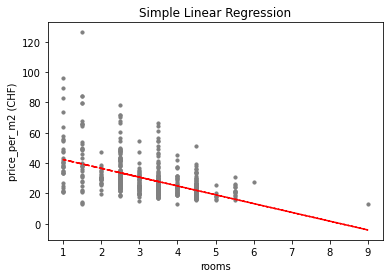

In [10]:
def myfunc(x):
    return slope * x + intercept

mymodel = pd.Series(map(myfunc, X_train))
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='grey')
plt.plot(X_train, mymodel, color='red', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('rooms')
plt.ylabel('price_per_m2 (CHF)')

plt.show()

In [11]:

residuals = mymodel - y_train
print(f'1st Predicted price_per_m2 in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price_per_m2 in dataset: {y_train[0]:.2f}')
print(f'1st Residual price_per_m2 in dataset: {residuals[0]:.2f}')

1st Predicted price_per_m2 in dataset: 27.86
1st Observed price_per_m2 in dataset: 26.07
1st Residual price_per_m2 in dataset: 1.79


1st Predicted price_per_m2 in dataset: 27.86
1st Observed price_per_m2 in dataset: 26.07
1st Residual price_per_m2 in dataset: 1.79


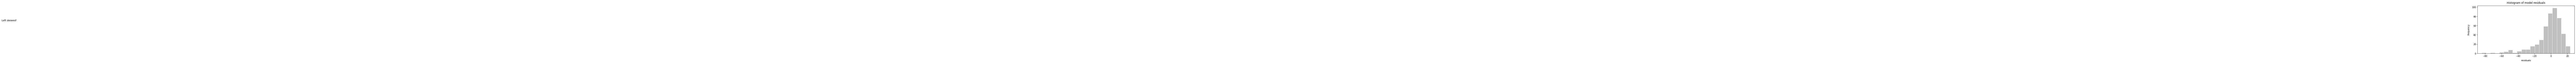

In [12]:
residuals = mymodel - y_train

print(f'1st Predicted price_per_m2 in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price_per_m2 in dataset: {y_train[0]:.2f}')
print(f'1st Residual price_per_m2 in dataset: {residuals[0]:.2f}')

fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='grey',
                            alpha=0.5, 
                            rwidth=0.95
                   )

plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

plt.text(-3100, 70, s="Left skewed! ", 
         fontsize=11, 
         color="black")
plt.show()

#### Aufgabe c
The R^2 and the histogram stayed the same.

# Simple linear regression (only one explanatory variable in the model)
For details see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [13]:
# Egal welches Verfahren man verwenedet (Decision tree etc.) Man macht zuerst einmal ein train-sample
# Create train and test samples
# Wir erstellen ienmal ein Split 80:20 der data (die 20% sind dann unabhänging => ähnlich wie ein externer Datensatz)
X_train, X_test, y_train, y_test = train_test_split(df['area'], 
                                                    df['price'], 
                                                    test_size=0.20, #man muss nicht unbedingt 80:20 (bei vielen Daten kann man auch mit viel weniger Daten samplen vlt 50:50 - leave-on-out wenn wenig Daten)
                                                    random_state=42)
# Show X_train
# X ist normalerweise unsere Matrix darum gross
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
# y beschreibt die Notation, mathematische Schreibweise von Vektor
print('y_train:')
print(y_train.head())

X_train:
362     75
369     90
496    100
349     94
308     94
Name: area, dtype: int64 

y_train:
362    1840
369    1570
496    1941
349    2480
308    2800
Name: price, dtype: int64


Ist er höher im Vergleich zu dem ursprünglichen Modell mit dem Preis als Zielvariable und der Fläche als erklärender Variable? Überprüfen Sie auch das Histogramm der Modellresiduen. Sind die Residuen normal verteilt? 


### Fit the simple linear regression model

##### Intercepter
<p>Intercepter ist der Schnittpunkt mit Y-Gerade (dort "startet" Gerade vom Scatterplot) => drückt aus, was der Preis wäre, wenn R = 0 wäre (wenn alle Variablen 0 wären). wenn man dies nicht machen würde und die Gerade durch den Nullpunkt zwingen würde, dann wäre der Graph nicht mehr so schön den Datensätzen angepasst (würde Steigung verfälschen). => mit Intercepter, kann man Gerade den Datenpunkten auslegen.<\p>
Slope = Steigung

mit y = 1191 + (12.326*100) könnte man Vorhersagen berechnen.
##### Error
E für Erro (bezieht sich immer auf Grundgesamtheit), hier kann man aber sagen, es sind die Residuen. Der Error berücksichtigt den Abstand zu den einzelnen Datenpunkten noch. 
    
Alpha + Beta*X (von hand berechnen - könnte an Prüfung kommen)

    
##### Was sagt Steigung genau aus?
    Mit jeder Einheit mit der mein x steigt, steigt der Preis (y) um 12.326 (= marginal Effekt)

In [14]:
# Fit the regression model mit Linearer Einfach-Regression
slope, intercept, r, p, std_err = stats.linregress(X_train, y_train)

# Print results of the regression model (slope = Steigung der Regressionsgerade)
print('Linear regression result:')
print(f'Intercept with y-axis (alpha):            {intercept:.2f}') #Schnittpunkt mit y-Achse (braucht es)
print(f'Slope of regression line (beta):          {slope:.3f}') #steigung
print(f'p-value:                                  {p:.4f}')
print(f'R-squared (coefficient of determination): {r**2:.4f}')

Linear regression result:
Intercept with y-axis (alpha):            1191.96
Slope of regression line (beta):          12.326
p-value:                                  0.0000
R-squared (coefficient of determination): 0.2711


### Plot regression line

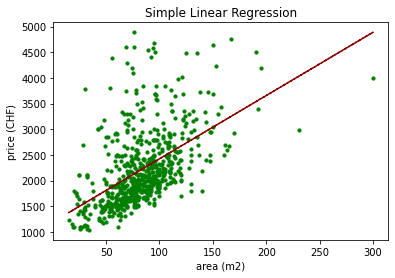

In [15]:
# Function to calculate model predictions
def myfunc(x):
    return slope * x + intercept

# Apply myfunc() to x, i.e. make predictions 
mymodel = pd.Series(map(myfunc, X_train))

# Scatterplot with regression line
plt.figure(figsize=(6,4))
plt.scatter(X_train, y_train, s=10, color='green')
plt.plot(X_train, mymodel, color='darkred', linestyle='dashed')
plt.title('Simple Linear Regression')
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')

plt.show()

### Check model residuals (residuals = predicted values minus observed values)

In [16]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

1st Predicted price in dataset: 2116.38
1st Observed price in dataset: 3180.00
1st Residual price in dataset: -1063.62


### Plot histogram of residuals

1st Predicted price in dataset: 2116.38
1st Observed price in dataset: 3180.00
1st Residual price in dataset: -1063.62


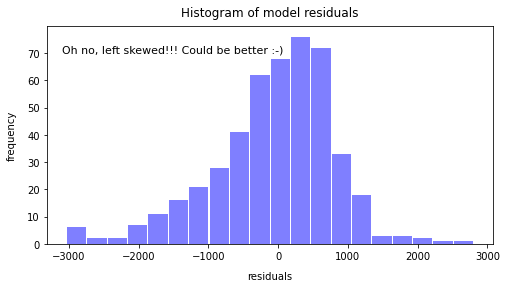

In [17]:
# Calculate residuals (here: predicted prices minus observed prices)
residuals = mymodel - y_train

# Check the first residual value in our data set
print(f'1st Predicted price in dataset: {mymodel[0]:.2f}')
print(f'1st Observed price in dataset: {y_train[0]:.2f}')
print(f'1st Residual price in dataset: {residuals[0]:.2f}')

# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=residuals, 
                            bins=20, 
                            color='blue',
                            alpha=0.5, 
                            rwidth=0.95
                   )

# Set title and labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-3100, 70, s="Oh no, left skewed!!! Could be better :-) ", 
         fontsize=11, 
         color="black")

# Show plot (ein Residuenplot sollte eigentlich normalverteilt sein)
plt.show()
# Wie kann man das besser machen? 1. Komplexeres Modlel nehmen (für Variablen Transformation mit log) oder wir bauen wie in Ln [8] mehr Variablen ein

### Compare the predicted prices with the observed prices in our test sample

In [18]:
# Create model predictions for test data
predicted = myfunc(X_test)
predicted.round(1)

# Compare predicted with observed price based on first 10 test samples
for i in range(0,10):
    print(f'Predicted price: {predicted.iloc[i]:.1f}, Observed price: {y_test.iloc[i]:.1f}')

Predicted price: 1980.8, Observed price: 2370.0
Predicted price: 2424.5, Observed price: 2300.0
Predicted price: 2843.6, Observed price: 4290.0
Predicted price: 2880.6, Observed price: 2480.0
Predicted price: 2116.4, Observed price: 2032.0
Predicted price: 2005.5, Observed price: 2090.0
Predicted price: 2350.6, Observed price: 1790.0
Predicted price: 2535.5, Observed price: 2280.0
Predicted price: 2671.0, Observed price: 2350.0
Predicted price: 2375.2, Observed price: 1600.0


# Multiple linear regression (more than one explanatory variable in the model)
For details see: https://www.statsmodels.org/dev/examples/notebooks/generated/predict.html

### Create train and test samples (train = 80%, test = 20% of the data)

In [19]:
# Create train and test samples (we name it X2_ and y_2 because we already used X_ and y_ above)
X2_train, X2_test, y2_train, y2_test = train_test_split(df[['area',
                                                            'pop_dens','tax_income','dist_supermarket']], 
                                                        df['price'], 
                                                        test_size=0.20, 
                                                        random_state=42)

# Show X2_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y2_train
print('y2_train:')
print(y2_train.head())

X2_train:
     area     pop_dens   tax_income  dist_supermarket
362    75  1662.597326  70118.99692        595.010106
369    90  1662.597326  70118.99692        157.537439
496   100  1327.635328  80595.52826        147.967057
349    94  1662.597326  70118.99692         52.959836
308    94  1662.597326  70118.99692         65.909235 

y2_train:
362    1840
369    1570
496    1941
349    2480
308    2800
Name: price, dtype: int64


### Fit the multiple regression model (yes, the output is rich :-), but we need only part of it for interpretation!)

In [20]:
# Add constant to the model
X2_train_const = sm.add_constant(X2_train)

# Create the multiple regression model
olsmod = sm.OLS(y_train, X2_train_const)
olsres = olsmod.fit()

# Print full model output
print(olsres.summary())

# was wir brauchen sind die geschätzten coefficienten, der p-Wert und der R-squared (0.55) und Adj. R-squared (0.553)
# const = intercepter  | area = steigungskoeffizient "wenn Fläche um eine Eineheit steigt, steigt Preis um 15.0355"
# pop density von Zürich = 0.2381
# 458 + (15.0333* 80(Fläche die wir predicten wollen.. vlt 120)) + (0.2381 * 4200(Bevölkungsdichte der G)) = Vorhersage für Wohnungspreis die in einer sehr dichten Bevölkerung liegt 
# df = Freiheitsgrade

#Manuelles Berechnen von Zürich Wohnpreisen = 3262.7791
(458.4991 + (15.0355*120) + (0.2381 * 4200))

#Manuelles Berechnen von Ländlichen Wohnpreisen = 1947.0591000000002
(458.4991 + (15.0355*80) + (0.2381 *1200)) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     208.4
Date:                Sat, 21 Jan 2023   Prob (F-statistic):          2.99e-114
Time:                        17:36:50   Log-Likelihood:                -4874.4
No. Observations:                 643   AIC:                             9759.
Df Residuals:                     638   BIC:                             9781.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               42.3865    125.190  

1947.0591000000002

#### Aufgabe d
The variables tax_income, const, area and pop_dens are statistically significant. The variable dist_supermarket is not in the 5% significance level and not statistically significant.

### Interpretation of the relevant (in this course) statistics in the table above

<b>R-squared:</b> This is the coefficient of determination (see slides of lessons). A value of 0.522 means, that the explanatory variables explain 52% of the variaton of our target variable (rental prices) - not bad, but could be improved.

<b>coef:</b> These are the estimated coefficients of the explanatory variables ('slopes of the regression line' of each variable). These are nedded for the price predictions in our model.

<b>P>|t|:</b> These are the p-values. If < 0.05, the explanatory variables shows a statistically siginificant (5% significance level) contribution in explaining the target variable. Except for the distiance to the nearest supermarkt, all variables are significant here.

### Plot histogram of residuals

Adj. R-squared ==> generalisiert den Wert (Abschlag über R'2)
F-Statistic ==> Gesamtstatistic
AIC = Acaide information cirterium ==> WErt der Modelle sollte möglichst klein sein, wenn man MOdelle miteinander vergleicht
Skew => bezieht sich auf Residuen

std err => Standardfehler von Koeffizienten = wenn man unendlich lang Samples zieht, bekommt man unterschiedliche Schätzungen

t Wert in t-Tabellen mit Freiheitsgeraden

über den P-wert kann man den t-wert ableiten (hier hochsignifikant, weil 0)

und Konfidenzintervall von [0.025 ; 0.975]

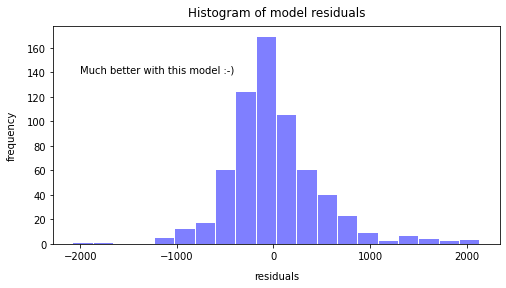

In [21]:
# Plot histogram of residuals
fig = plt.figure( figsize=(8,4))
n, bins, patches = plt.hist(x=olsres.resid, 
                            bins=20, 
                            color='blue',
                            alpha=0.5,
                            rwidth=0.95
                   )

# Set labels
plt.xlabel('residuals', fontsize=10, labelpad=10)
plt.ylabel('frequency', fontsize=10, labelpad=10)
plt.title('Histogram of model residuals', fontsize=12, pad=10)

# Add text annotation
plt.text(-2000, 140, s="Much better with this model :-) ", fontsize=10, color="black")

plt.show()
#wenn wir Residuen nicht transformieren, dann bleiben sie in der Einheit von Schweizer Franken
# Wenn wir C-Variable transformieren, dann haben wir eine transformierte Einheit
# sieht gut aus, keine systematische Abweichung (Unter- oder Überschätzung)

### Compare the predicted prices with the observed prices in the test sample

In [22]:
# Add constant to X2_test
X2_test_const = sm.add_constant(X2_test)
predicted_new = olsres.predict(X2_test_const)

# Compare predicted with observed price based on first 10 test samples
for i in range(0,10):
    print(f'Predicted price: {predicted_new.iloc[i]:.1f}, Observed price: {y_test.iloc[i]:.1f}')

# keine systematische Über- oder Unterschätzung

Predicted price: 2542.6, Observed price: 2370.0
Predicted price: 2117.9, Observed price: 2300.0
Predicted price: 3613.8, Observed price: 4290.0
Predicted price: 2816.2, Observed price: 2480.0
Predicted price: 1858.0, Observed price: 2032.0
Predicted price: 1838.6, Observed price: 2090.0
Predicted price: 1961.2, Observed price: 1790.0
Predicted price: 2394.9, Observed price: 2280.0
Predicted price: 2486.4, Observed price: 2350.0
Predicted price: 2219.6, Observed price: 1600.0
